Decision tree

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [2]:
X_test = pd.read_csv('data_source/X_test.csv')
y_test = pd.read_csv('data_source/y_test.csv')

X_train = pd.read_csv('data_source/X_train.csv')
y_train = pd.read_csv('data_source/y_train.csv')

In [3]:
pipe = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('classifier', DecisionTreeClassifier()) # object='multi:softmax',num_class=4,seed=42,eval_metric='merror'
])

hyperparameters = {
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],  # measure the quality of a split
    'classifier__splitter': ['best', 'random'],  # split at each node
    'classifier__max_depth': [1,2,3,4,5,6,7,8],  # maximum depth of the tree
    'classifier__min_samples_split': [1, 2, 4, 6, 8],  # minimum number of samples required to split an internal node
    'classifier__max_features': ['auto', 'sqrt', 'log2'] # number of features to consider when looking for the best split
    
}


In [5]:
grid = GridSearchCV(pipe,hyperparameters,cv=5,scoring='f1_macro',n_jobs=-1)
grid.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

/Users/itthisak/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/itthisak/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/itthisak/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/itthisak/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed

Best parameter (CV score=0.958):
{'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}
Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=8, max_features='sqrt'))])


In [16]:
# Redefine the pipeline using result from gridsearch
pipe.set_params(classifier__criterion ='gini',classifier__max_depth=8,
                classifier__max_features='sqrt',classifier__min_samples_split=2,
                classifier__splitter = 'best')

pipe.fit(X_train, y_train,)

print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.9535644465091071
Test set score: 0.9706002034587996


In [17]:
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=5, scoring='f1_macro')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

/var/folders/v5/n7zzf9t13vn15ppbmryx4bdr0000gn/T/ipykernel_89799/896097450.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='b', linestyle='-')


Text(0.5, 1.0, 'Decision Tree Learning Curve')

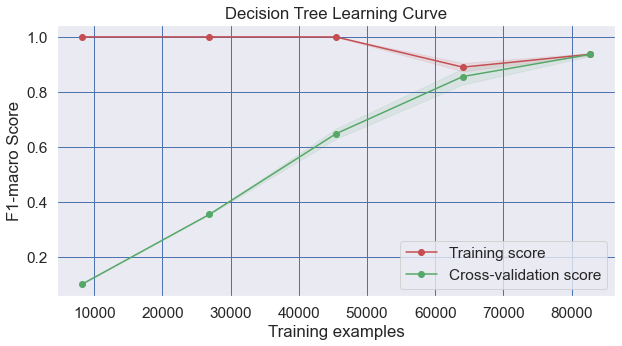

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
plt.xlabel("Training examples")
plt.ylabel("F1-macro Score")

plt.grid(b=True, which='major', color='b', linestyle='-')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

plt.legend(loc="best")
plt.title('Decision Tree Learning Curve')

In [19]:
pipe.fit(X_train, y_train)

train_yhat = pipe.predict(X_train)
train_pipe = pipe.score(X_train,y_train)

test_yhat = pipe.predict(X_test)
test_pipe = pipe.score(X_test,y_test)
print('Train Score\n',classification_report(y_train,train_yhat))
print('Test Score\n',classification_report(y_test, test_yhat))
print(f"AVG F1-Score Train: {train_pipe}\nAVG F1-Score Test: {test_pipe}")


Train Score
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26036
           1       0.93      0.85      0.89     25387
           2       1.00      1.00      1.00     26234
           3       0.87      0.94      0.90     25669

    accuracy                           0.95    103326
   macro avg       0.95      0.95      0.95    103326
weighted avg       0.95      0.95      0.95    103326

Test Score
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11292
           1       1.00      0.88      0.93      4496
           2       1.00      1.00      1.00      3856
           3       0.02      0.75      0.04        16

    accuracy                           0.97     19660
   macro avg       0.75      0.91      0.74     19660
weighted avg       1.00      0.97      0.98     19660

AVG F1-Score Train: 0.9488802431140274
AVG F1-Score Test: 0.9715666327568667


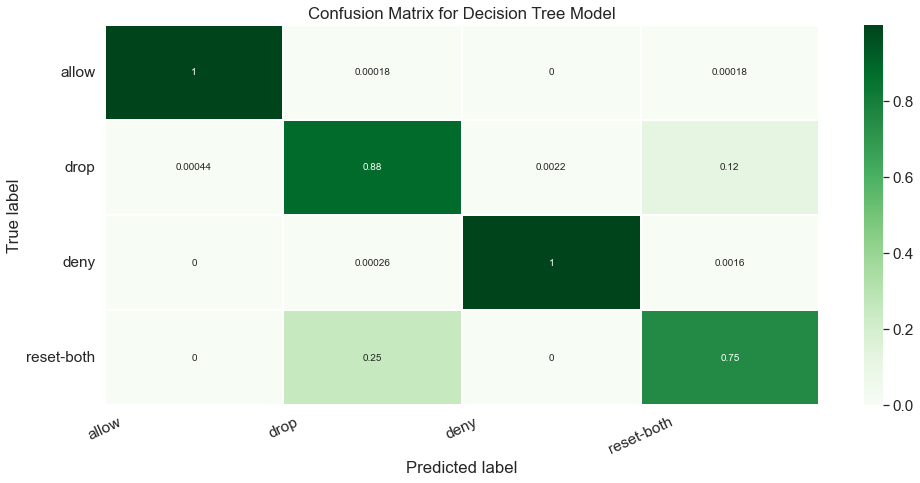

In [21]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, test_yhat)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['allow','drop','deny','reset-both']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

# About 75% of the time, reset-both were mislabeled as drop!